<center>
      <h1 style="font-size: 36px;"><strong>Data cleaning and EDA(exploratory data analysis) on Cirrhossis Dataset to explore the relationship between variables and identify patterns and trends in Data</strong></h1>
</center>

Importing Required Libraries

In [22]:
import pandas as pd
import numpy as np


Download dataset as pandas dataframe

In [23]:
df = pd.read_csv('D:/dataset/Cirrhosis Patient Survival Prediction/cirrhosis_small_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             435 non-null    int64  
 1   N_Days         435 non-null    int64  
 2   Status         435 non-null    object 
 3   Drug           325 non-null    object 
 4   Age            435 non-null    int64  
 5   Sex            435 non-null    object 
 6   Ascites        325 non-null    object 
 7   Hepatomegaly   325 non-null    object 
 8   Spiders        325 non-null    object 
 9   Edema          435 non-null    object 
 10  Bilirubin      435 non-null    float64
 11  Cholesterol    296 non-null    float64
 12  Albumin        435 non-null    float64
 13  Copper         323 non-null    float64
 14  Alk_Phos       325 non-null    float64
 15  SGOT           325 non-null    float64
 16  Tryglicerides  294 non-null    float64
 17  Platelets      422 non-null    float64
 18  Prothrombi

**Observation**


In [4]:
rows, cols = df.shape
print(f'Number of rows: {rows} and columns: {cols}')

Number of rows: 435 and columns: 20


In [5]:
print (f'Followings columns features exists in the dataset {df.columns}')

Followings columns features exists in the dataset Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [6]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [7]:
df.sample(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
152,147,2995,C,D-penicillamine,27398,F,N,N,N,S,1.2,288.0,3.37,32.0,791.0,57.35,114.0,213.0,10.7,2.0
327,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
396,381,1899,C,NaN,14975,M,NaN,NaN,NaN,N,1.7,NaN,3.66,NaN,NaN,NaN,NaN,92.0,11.0,4.0
112,108,2583,D,D-penicillamine,18393,F,N,N,N,N,0.4,127.0,3.50,14.0,1062.0,49.60,84.0,334.0,10.3,2.0
104,111,2350,CL,D-penicillamine,15031,F,N,N,N,N,5.5,528.0,4.18,77.0,2404.0,172.05,78.0,467.0,10.7,3.0
430,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
12,13,3577,C,Placebo,16688,F,N,N,N,N,0.7,281.0,3.85,40.0,1181.0,88.35,130.0,244.0,10.6,3.0
358,344,3157,C,NaN,13149,F,NaN,NaN,NaN,N,8.9,NaN,3.76,NaN,NaN,NaN,NaN,209.0,10.6,3.0
198,192,2443,C,D-penicillamine,19256,F,N,Y,N,N,0.9,308.0,3.69,67.0,696.0,51.15,101.0,344.0,9.8,4.0
221,214,1786,D,Placebo,25329,F,N,Y,N,N,0.9,404.0,3.43,34.0,1866.0,79.05,224.0,236.0,9.9,3.0


In [8]:
# find missing values in each column
print(f'Followings are missing values in each column \n{df.isnull().sum().sort_values(ascending=False)}')


Followings are missing values in each column 
Tryglicerides    141
Cholesterol      139
Copper           112
Drug             110
Ascites          110
Hepatomegaly     110
Spiders          110
SGOT             110
Alk_Phos         110
Platelets         13
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64


In [9]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,435.000000,435.000000,435.000000,435.000000,296.000000,435.000000,323.000000,325.000000,325.000000,294.000000,422.000000,433.000000,429.000000
mean,208.905747,1916.972414,18580.340230,3.229655,370.040541,3.497448,98.981424,1951.995692,122.692400,124.207483,256.779621,10.736028,3.025641
std,120.861549,1093.510370,3866.534371,4.362843,228.758310,0.423355,85.962614,2105.241370,55.919393,64.807205,98.350076,1.014522,0.881691
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.500000,1089.000000,15661.000000,0.800000,250.750000,3.245000,42.500000,876.000000,82.150000,84.000000,188.250000,10.000000,2.000000
50%,210.000000,1746.000000,18628.000000,1.400000,314.500000,3.530000,74.000000,1243.000000,116.250000,108.000000,251.000000,10.600000,3.000000
75%,313.500000,2598.000000,21300.500000,3.400000,401.000000,3.775000,126.500000,1960.000000,151.900000,151.000000,317.750000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


<center>
      <h1 style="font-size: 36px;"><strong>Univariate Analysis (Single Column Analysis)</strong></h1>
</center>

In [10]:
female,male = df['Sex'].value_counts()
print(f' There are {male} male patients and {female} female patients in the dataset')

 There are 52 male patients and 383 female patients in the dataset


In [11]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [12]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [13]:
print(f'There are following patients in Stage \n {df.Stage.value_counts()} ')

There are following patients in Stage 
 Stage
3.0    159
4.0    151
2.0     98
1.0     21
Name: count, dtype: int64 


In [14]:
print(f'Number of patients given drugs \n {df.Drug.value_counts()}')

Number of patients given drugs 
 Drug
D-penicillamine    168
Placebo            157
Name: count, dtype: int64


1. Number of patients at stage 4 and given penciline drug  
2. Number of patients at stage 4 given palcebo drug

In [15]:
total_patients_placebo = df[(df['Stage']==4) & (df['Drug'] == 'Placebo')]
total_patients_penciline =df[(df['Stage']==4) & (df['Drug'] == 'D-penicillamine')]
print(f'Patients at stage 4 given placebo medicine {total_patients_placebo.shape[0]} and D-penicillamine medicine {total_patients_penciline.shape[0]}')

Patients at stage 4 given placebo medicine 56 and D-penicillamine medicine 59


Find the number of patients at stage 4 and given placebo drug and they were dead. 

In [16]:
patients_placebo_dead = df[(df['Stage']==4) & (df['Drug'] == 'Placebo') & (df['Status']=='D')]
patients_penciline_dead =df[(df['Stage']==4) & (df['Drug'] == 'D-penicillamine')& (df['Status']=='D')]
print(f'{patients_placebo_dead.shape[0]} Patients at stage 4 were given placebo medicine and they are dead \n and {patients_penciline_dead.shape[0]} stage 4 patients were given D-penicillamine medicine and they are dead ')

32 Patients at stage 4 were given placebo medicine and they are dead 
 and 36 stage 4 patients were given D-penicillamine medicine and they are dead 


Which medicine is more effective to treat cirrhosis stage 4?

In [17]:
print(f'Percent of total patients given  medicine Placebo {patients_placebo_dead.shape[0]/total_patients_placebo.shape[0]*100}')

Percent of total patients given  medicine Placebo 57.14285714285714


In [18]:
print(f'Percent of total patients given  medicine D-penicillamine {patients_penciline_dead.shape[0]/total_patients_penciline.shape[0]*100}')

Percent of total patients given  medicine D-penicillamine 61.016949152542374


<center>
      <h1 style="font-size: 36px;"><strong>**Study Conclusion** </strong></h1> </center>
</h3> In this study we measure efeectivity of Placebo and D-penicillamine medicines on cirrhosis patients at stage 4.  
Our conclusion is that total 56 patients were given Placebo medicine and 59 patients were given D-penicillamine medicine  
57% patients under drug Placebo were exipred and 61% patients under drug D-penicillamine were dead. 
It is concluded that ... drug is more effective in treating cirrhosis stage 4 disease. </h3> 


#### Finding Duplicates and Outliers in dataset

In [19]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

Introduce some duplicates in dataset

In [20]:
df.count()

ID               435
N_Days           435
Status           435
Drug             325
Age              435
Sex              435
Ascites          325
Hepatomegaly     325
Spiders          325
Edema            435
Bilirubin        435
Cholesterol      296
Albumin          435
Copper           323
Alk_Phos         325
SGOT             325
Tryglicerides    294
Platelets        422
Prothrombin      433
Stage            429
dtype: int64

In [21]:
duplicates = df.sample(10)
df = pd.concat([df, duplicates])


In [22]:
df.count()

ID               445
N_Days           445
Status           445
Drug             333
Age              445
Sex              445
Ascites          333
Hepatomegaly     333
Spiders          333
Edema            445
Bilirubin        445
Cholesterol      302
Albumin          445
Copper           331
Alk_Phos         333
SGOT             333
Tryglicerides    300
Platelets        432
Prothrombin      443
Stage            438
dtype: int64

In [23]:
#finding the duplicates in the dataset
df[df.duplicated()]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
13,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
45,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
56,38,3244,D,Placebo,13378,F,N,Y,Y,N,3.3,383.0,3.53,102.0,1234.0,137.95,87.0,234.0,11.0,4.0
75,50,2598,D,D-penicillamine,19544,F,N,Y,N,N,1.1,257.0,3.36,43.0,1080.0,106.95,73.0,128.0,10.6,4.0
115,111,2350,CL,D-penicillamine,15031,F,N,N,N,N,5.5,528.0,4.18,77.0,2404.0,172.05,78.0,467.0,10.7,3.0
149,118,2288,D,D-penicillamine,17844,F,N,Y,N,N,3.5,390.0,3.30,67.0,878.0,137.95,93.0,207.0,10.2,3.0
161,139,2106,C,Placebo,17080,F,N,Y,N,N,1.1,328.0,3.31,159.0,1260.0,94.55,134.0,142.0,11.6,4.0
201,178,2580,C,D-penicillamine,25569,F,N,N,N,N,0.6,NaN,4.08,51.0,665.0,74.40,NaN,325.0,10.2,4.0
225,210,2224,C,Placebo,18176,M,N,Y,N,N,0.9,346.0,3.37,81.0,1098.0,122.45,90.0,298.0,10.0,2.0
243,227,999,D,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,2.0


In [24]:
print(f'Following are the total duplicate rows in the dataset {df["ID"].duplicated().sum()}')

Following are the total duplicate rows in the dataset 27


Classroom Assignment
Print patients ID whose are alive and has cholestrol above 750 and are on stage 4 

##### Univariate Visualization

In [25]:
!pip install seaborn

<Axes: xlabel='Ascites', ylabel='Cholesterol'>

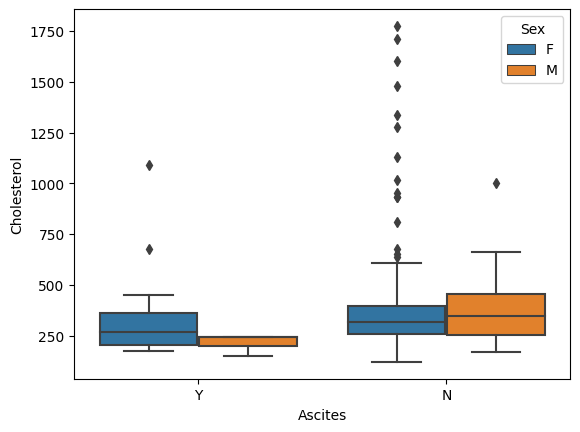

In [26]:
#finding outliers in cholestrol column
import seaborn as sns
sns.boxplot(data=df, x='Ascites', y='Cholesterol',  hue='Sex') 

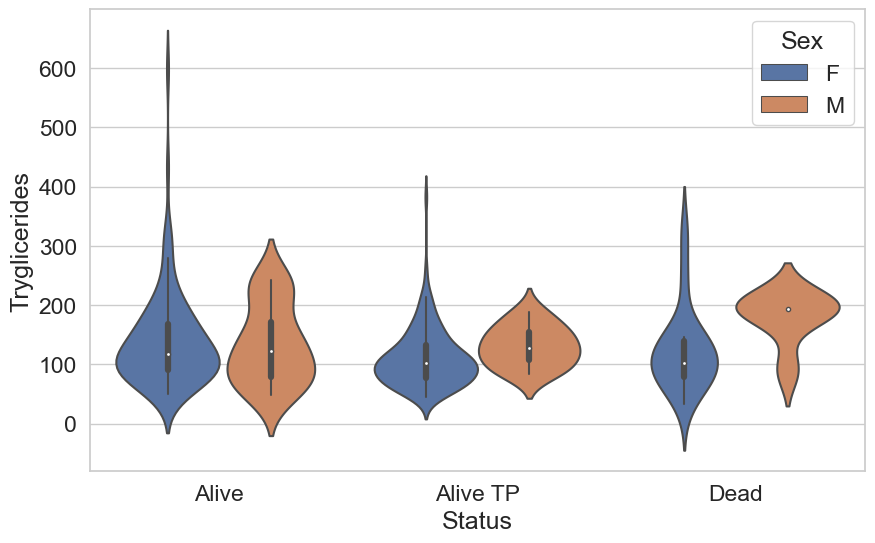

In [27]:
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", font='sans-serif', font_scale=1.5)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Status', y='Tryglicerides',hue='Sex')
plt.xticks(ticks=[0,1, 2], labels=['Alive', 'Alive TP', 'Dead'])
plt.show()

In [28]:
df.sample(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
48,47,2576,C,Placebo,17323,F,N,N,N,N,0.5,316.0,3.65,68.0,1716.0,187.55,71.0,356.0,9.8,3.0
223,216,2168,C,D-penicillamine,21610,F,N,N,N,N,0.5,NaN,3.68,20.0,856.0,55.80,NaN,146.0,10.4,3.0
173,167,1682,D,D-penicillamine,22265,M,N,Y,N,N,0.9,376.0,3.86,200.0,1015.0,83.70,154.0,238.0,10.3,4.0
240,232,1951,C,D-penicillamine,18329,F,N,Y,N,N,0.4,267.0,3.02,47.0,1001.0,133.30,87.0,265.0,10.6,3.0
128,124,3069,C,D-penicillamine,19318,M,N,Y,N,N,0.6,251.0,3.90,25.0,681.0,57.35,107.0,182.0,10.8,4.0
93,90,2689,D,D-penicillamine,12227,M,N,N,N,N,1.6,660.0,4.22,94.0,1857.0,151.90,155.0,337.0,11.0,2.0
398,383,1022,CL,NaN,13514,F,NaN,NaN,NaN,S,0.8,NaN,3.00,NaN,NaN,NaN,NaN,76.0,10.8,4.0
323,312,788,C,Placebo,12109,F,N,N,Y,N,6.4,576.0,3.79,186.0,2115.0,136.00,149.0,200.0,10.8,2.0
164,158,2475,CL,D-penicillamine,13329,F,N,N,N,N,3.4,450.0,3.37,32.0,1408.0,116.25,118.0,313.0,11.2,2.0
151,146,2615,C,Placebo,12369,F,N,N,N,S,1.2,NaN,3.89,58.0,1284.0,173.60,NaN,239.0,9.4,3.0


In [29]:
df['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

Convert non-numeric values into numeric values using label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
df['Drug']=encoder.fit_transform(df['Drug'])

In [21]:
df['Drug'].unique()

array([0, 1, 2])

In [32]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


pip install scikit-learn

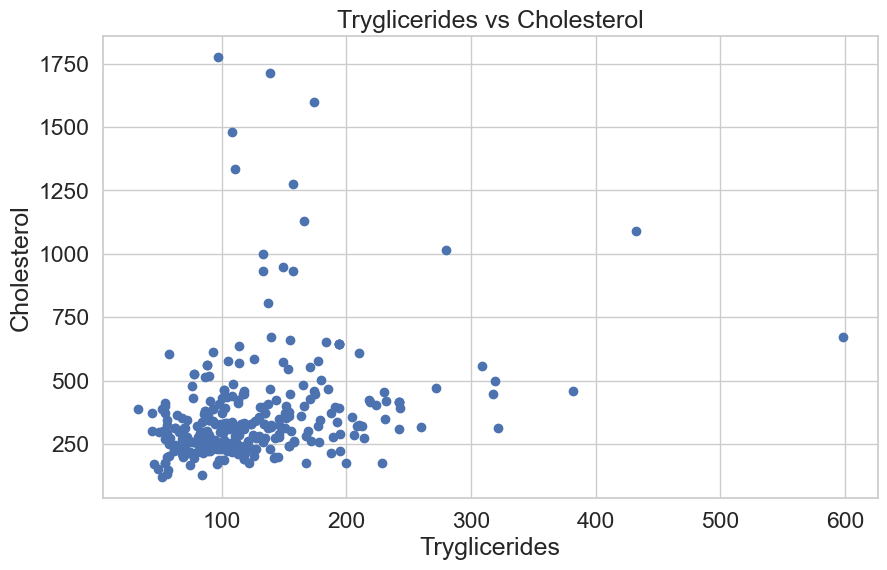

In [33]:
#Scatter plot for Tryglicerides vs cholestrerol

plt.figure(figsize=(10,6))
plt.scatter(df['Tryglicerides'], df['Cholesterol'])
plt.xlabel('Tryglicerides')
plt.ylabel('Cholesterol')
plt.title('Tryglicerides vs Cholesterol')
plt.show()

pip install seaborn

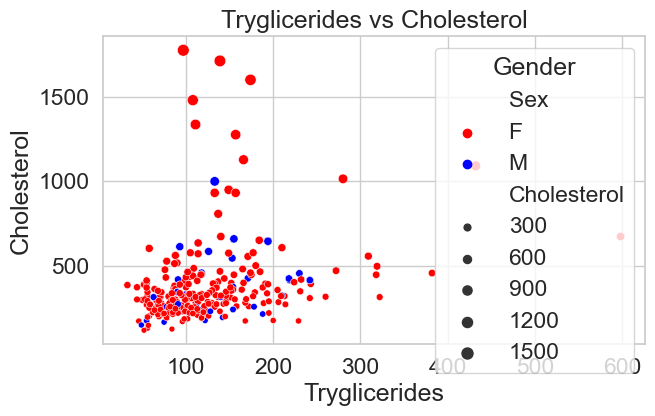

In [34]:
#Add gender legend in scatter plot
plt.figure(figsize=(7,4))
color_palette = {'F':'red', 'M':'blue'}
plt.title('Tryglicerides vs Cholesterol')
import seaborn as sns
sns.scatterplot(data=df, x='Tryglicerides', y='Cholesterol', size='Cholesterol',
                hue='Sex', palette=color_palette)
plt.legend(loc='upper right', title='Gender')
plt.show()

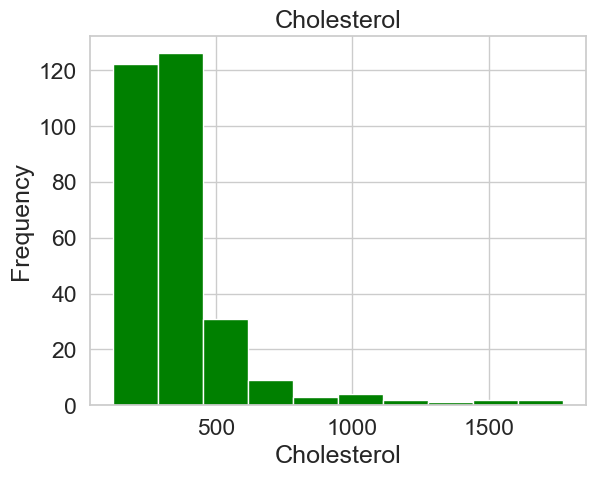

In [35]:
df['Cholesterol'].hist(color='green')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol')
plt.show()

In [36]:
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nagna\AppData\Local\Temp\ipykernel_45660\3747748384.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Sex']=='M']['Tryglicerides'], color='red', label='Male')
C:\Users\nagna\AppData\Local\Temp\ipykernel_45660\3747748384.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[

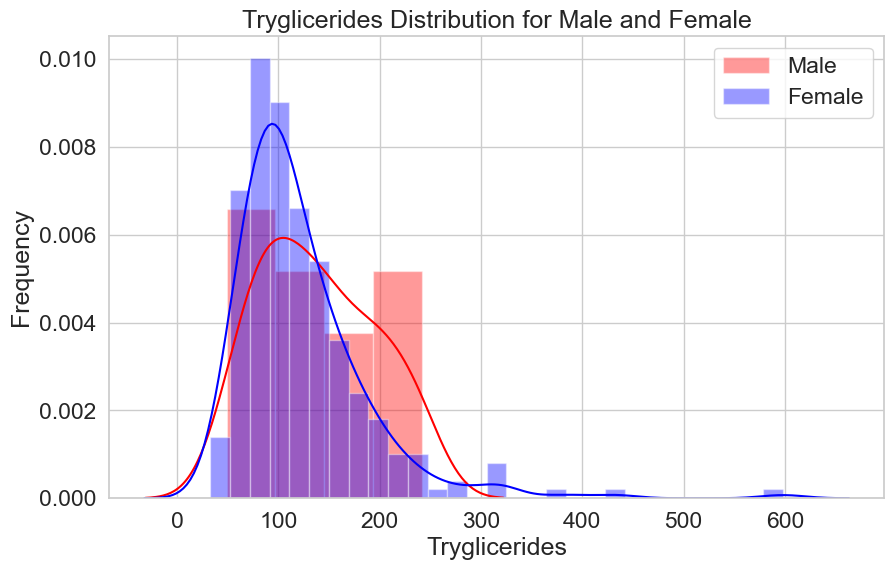

In [37]:
plt.figure(figsize=(10,6))

sns.distplot(df[df['Sex']=='M']['Tryglicerides'], color='red', label='Male')
sns.distplot(df[df['Sex']=='F']['Tryglicerides'], color='blue', label='Female')
plt.xlabel('Tryglicerides')
plt.ylabel('Frequency')
plt.title('Tryglicerides Distribution for Male and Female')
plt.legend(loc='upper right')
plt.show()

Viewing distribution plots of dataset columns

In [38]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # Remove Categorical Columns
    nRow, nCol = divmod(df.shape[1], nGraphPerRow)
    if nCol == 0:
        nCol = nGraphPerRow
    else:
        nCol += 1
    fig_width = nCol * 3
    fig_height = nRow * 3
    fig, axs = plt.subplots(nrows=nRow, ncols=nCol, figsize=(fig_width, fig_height))
    column_index = 0
    for i in range(nRow):
        for j in range(nCol):
            if column_index < df.shape[1]:
                axs[i][j].hist(df[df.columns[column_index]], bins=25, color='#1f77b4')
                axs[i][j].set_title(df.columns[column_index], fontsize=10)
                axs[i][j].tick_params(axis='both', which='major', labelsize=8)
                column_index += 1
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

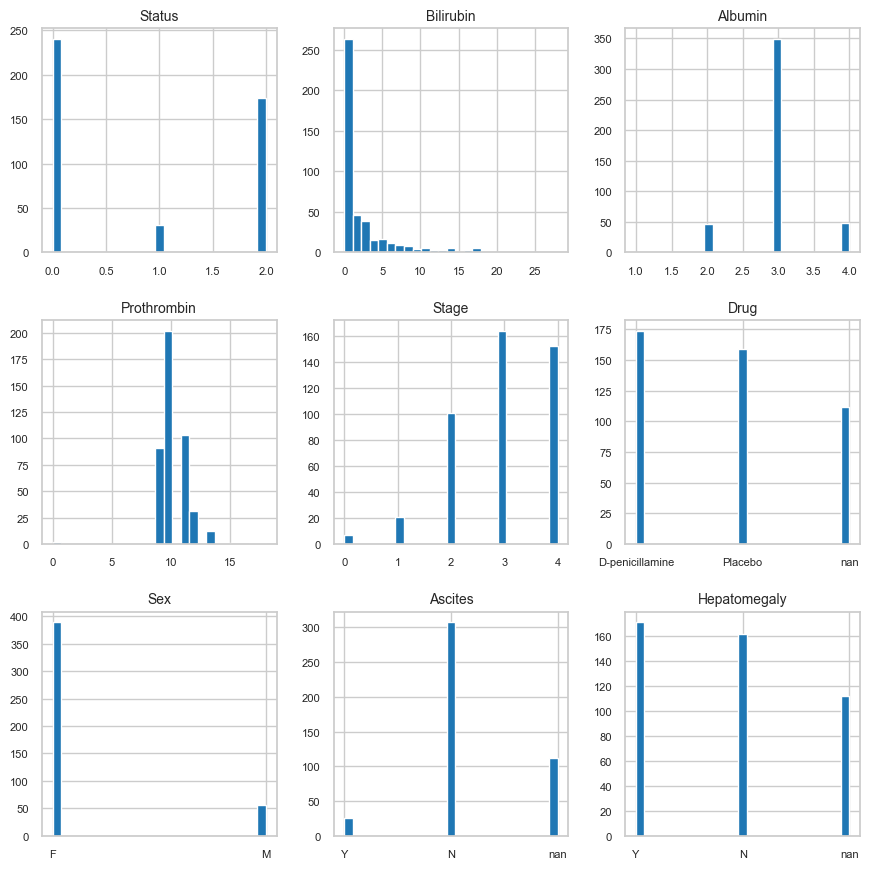

In [39]:
df_int = df.select_dtypes(include=['int']).copy()
df_float = df.select_dtypes(include=['float']).copy()
for col in df_float.columns:
    df_float[col] = df_float[col].fillna(0).astype(int) # replace non-finite values with 0 and cast to int
df_str = df.select_dtypes(include=['object']).copy()
for col in df_str.columns:
    df_str[col] = df_str[col].astype(str)
df_new = pd.concat([df_int, df_float, df_str], axis=1)
plotPerColumnDistribution(df_new,10, 3) #plotting histogram (Distribution graphs) for each column in dataset


<center>
      <h1 style="font-size: 36px;"><strong>Multivariate Analysis</strong></h1>
</center>

Parallel Plot

In [40]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.io as pio
# Select columns to plot
columns_to_plot = ['Bilirubin', 'Cholesterol','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']
df_sample = df.sample(frac=0.02) # You can change the sample size here (frac=0.02 means 2% of the data random sampled)
df_to_plot = df_sample[columns_to_plot]

# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_plot), columns=df_to_plot.columns)

# Create parallel coordinates chart for all columns in df
fig = px.parallel_coordinates(df_normalized, color=df_to_plot.index)

# Update layout with new figure size
fig.update_layout(autosize=False, width=1000, height=700)

# Add title at the bottom of the figure
fig.add_annotation(
    dict(
        x=0.5,
        y=-0.1,
        showarrow=False,
        text="Parallel Coordinates Chart for All Nominal Columns",
        xref="paper",
        yref="paper",
        font=dict(size=18)
    )
)

# Show the plot
fig.show()

**Deviation Plot**
of columns selected in previous charts 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


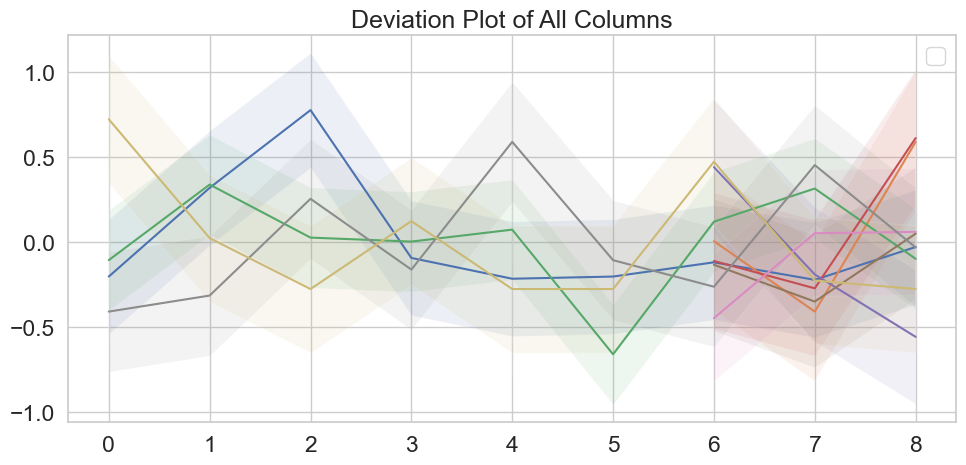

In [41]:
from sklearn.preprocessing import LabelEncoder
# Calculate the standard deviation of the selected columns
df_normalized= pd.DataFrame(scaler.fit_transform(df_to_plot), 
                            columns=df_to_plot.columns)
df_mean = df_normalized.mean()
df_deviation = df_normalized - df_mean
df_std = df_deviation.std()

# Convert the 'Drug' column into numeric values using label encoding
encoder = LabelEncoder()
df['Drug'] = encoder.fit_transform(df['Drug'])

# Create a single plot for all columns
fig, ax = plt.subplots(figsize=(10,5))

# Iterate over all columns
for column in df_deviation.columns:
    ax.plot(df_deviation.index, df_deviation[column])
    ax.fill_between(df_deviation.index, (df_deviation[column]-df_std[column]), (df_deviation[column]+df_std[column]), alpha=.1)

ax.set_title('Deviation Plot of All Columns')
ax.legend()

plt.tight_layout()
plt.show()

Deviation chart of selected columns on individual figure

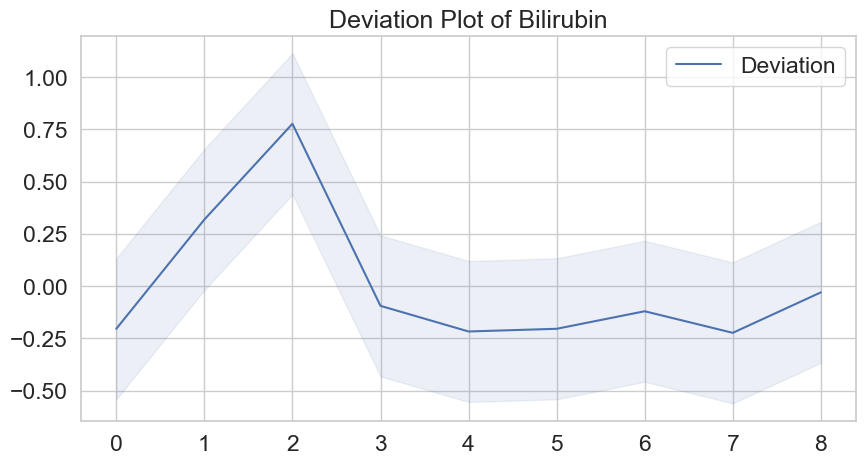

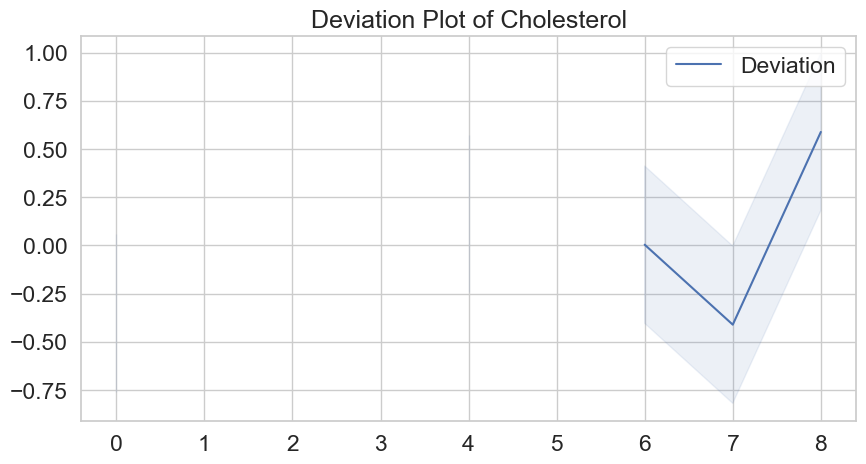

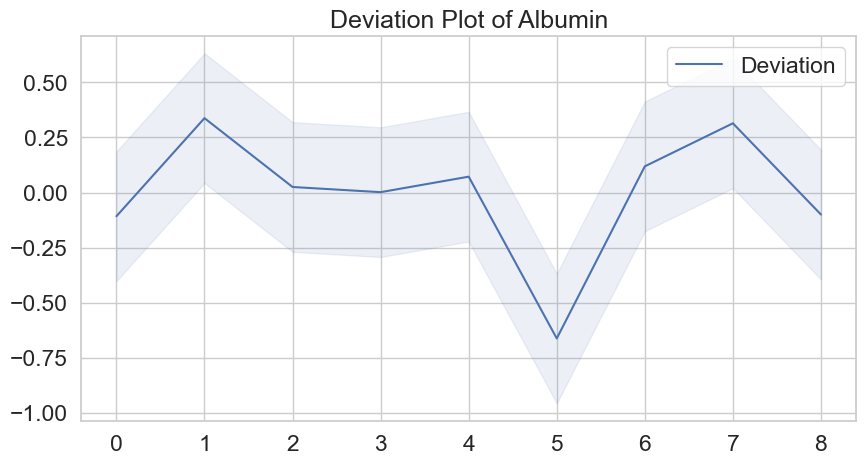

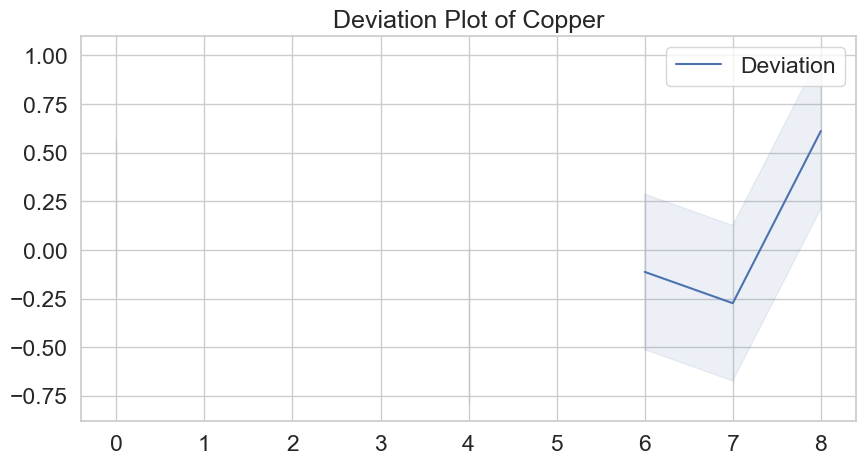

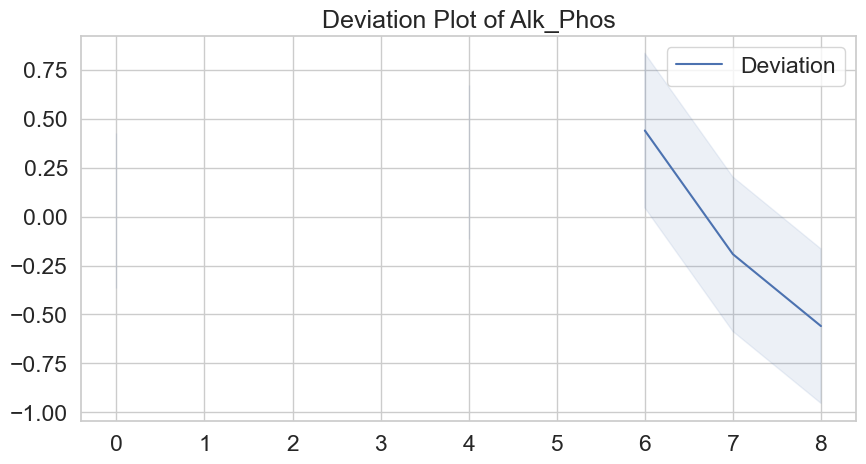

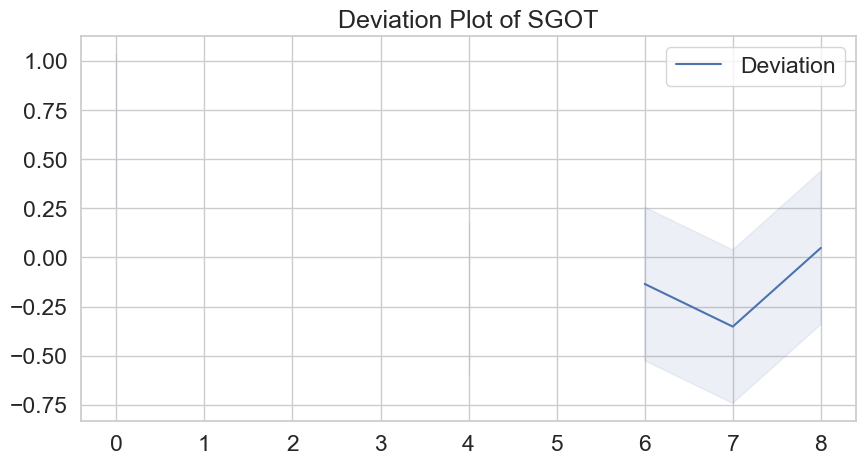

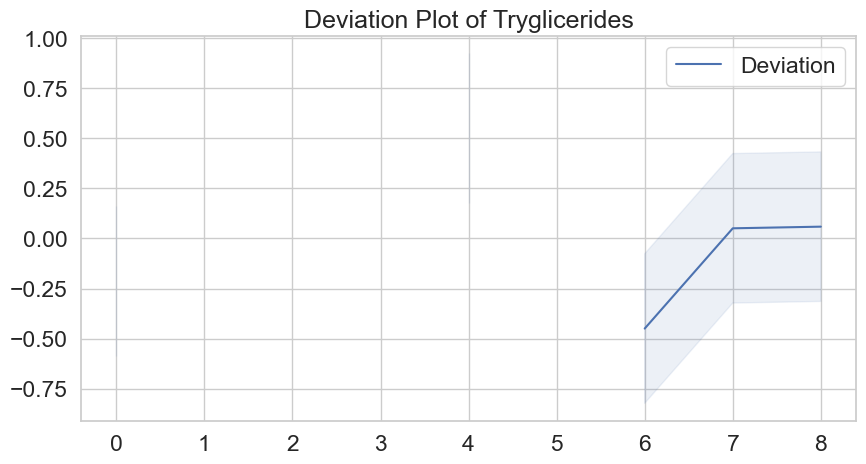

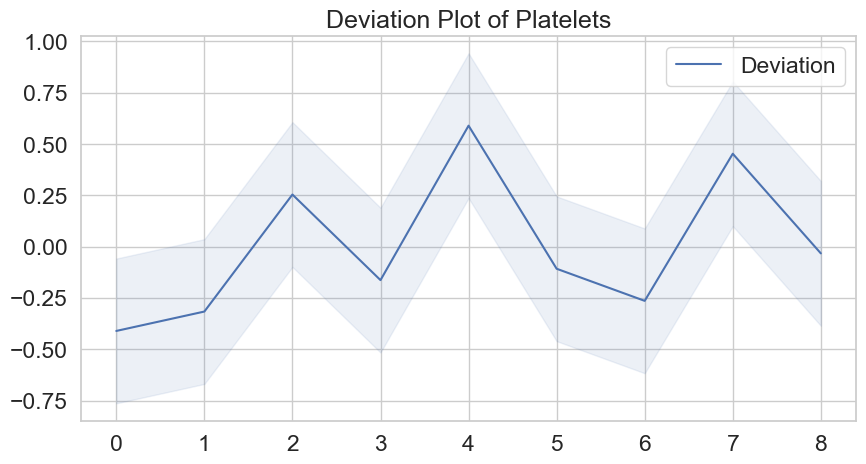

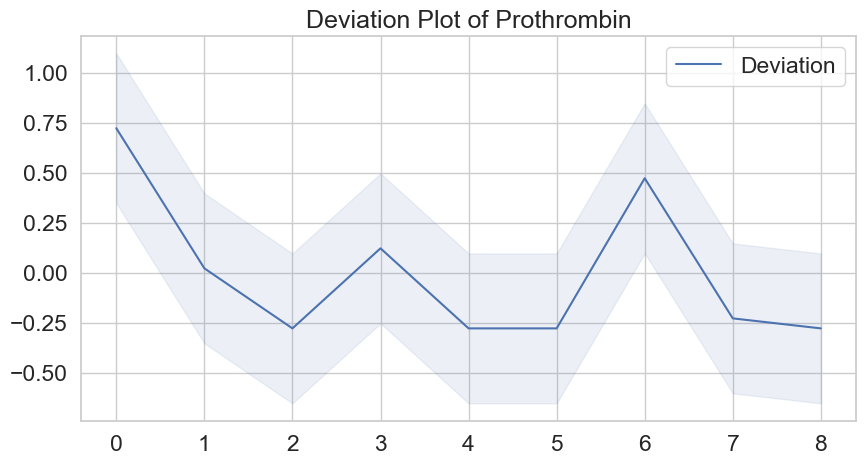

In [42]:
# Calculate the standard deviation of the selected columns
df_std = df_deviation.std()

# Create a deviation plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10,5))
    plt.title(f'Deviation Plot of {column}')
    plt.plot(df_deviation.index, df_deviation[column], label='Deviation')
    plt.fill_between(df_deviation.index, (df_deviation[column]-df_std[column]), (df_deviation[column]+df_std[column]), color='b', alpha=.1)
    plt.legend()
    plt.show()

#### Handling missing values

In [43]:
df.isnull().sum().sort_values(ascending=False) #find the missing records in the dataset

Tryglicerides    145
Cholesterol      143
Copper           114
SGOT             112
Ascites          112
Hepatomegaly     112
Spiders          112
Alk_Phos         112
Platelets         13
Stage              7
Prothrombin        2
Albumin            0
ID                 0
N_Days             0
Edema              0
Sex                0
Age                0
Drug               0
Status             0
Bilirubin          0
dtype: int64

<Axes: >

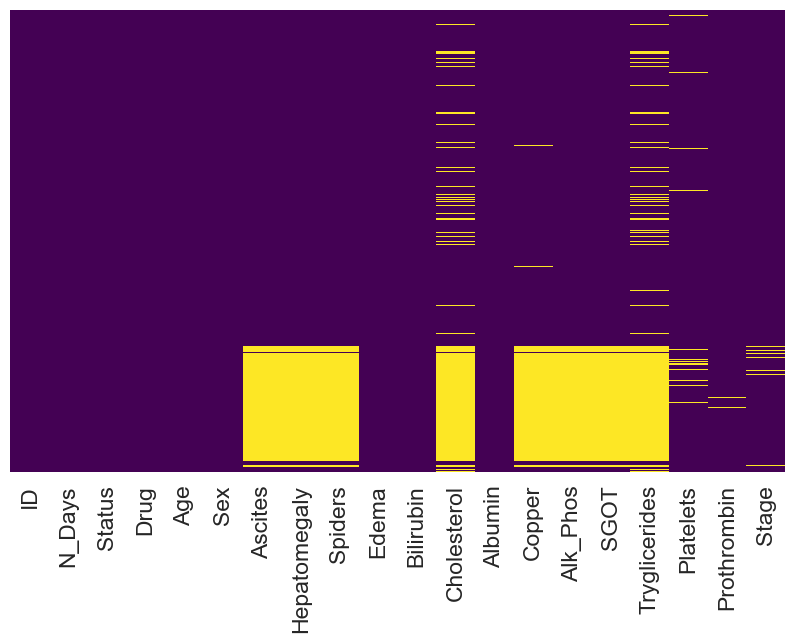

In [44]:
#Visualize missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<center>
      <h1 style="font-size: 36px;"><strong> correlation coefficient Between the Variables</strong></h1>
</center>

<Axes: >

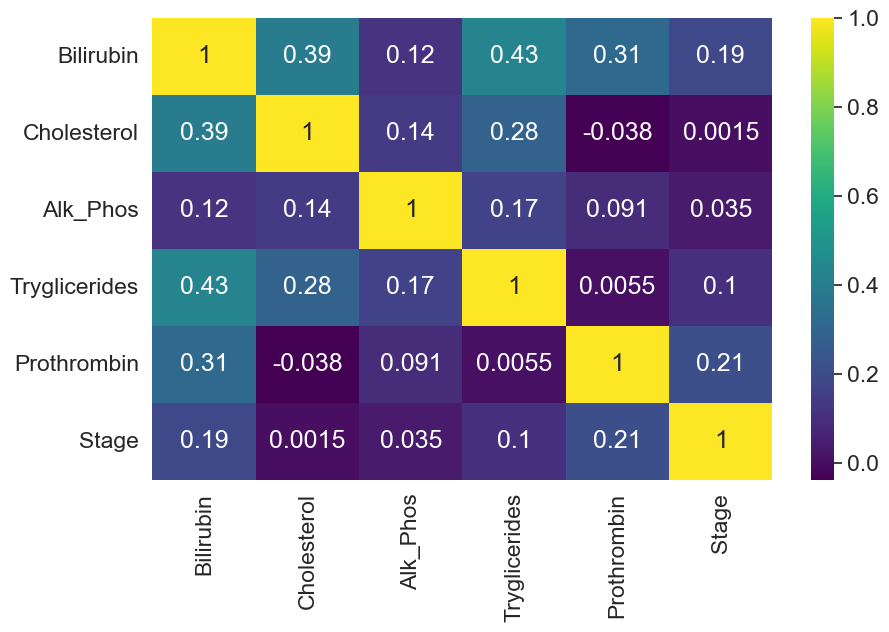

In [45]:
#Pearson Correlation Heatmap
plt.figure(figsize=(10,6))
selected_columns = df[['Bilirubin', 'Cholesterol', 
                       'Alk_Phos', 'Tryglicerides', 'Prothrombin', 'Stage']]
correlation_matrix = selected_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

<center>
      <h1 style="font-size: 36px;"><strong>Data Cleaning</strong></h1>
</center>

#### Techniques to handle missing values
1. Drop the column
2. Drop the missing values
3. Impute missing values
4. Handling using Machine Learning Techniques

##### Drop Method

In [46]:
df.columns #check columns in the dataset

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [94]:
df.drop('Tryglicerides', axis=1, inplace=True) #drop the Tryglicerides column from the dataset


In [95]:
df.columns #verify Tryglicerides column is drooped

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [96]:
df.sample(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage
417,401,935,2,2,25202,F,NaN,NaN,NaN,N,4.2,NaN,3.19,NaN,NaN,NaN,120.0,11.1,4.0
42,42,4453,0,1,12307,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,344.0,11.0,4.0
376,362,2267,1,2,17897,F,NaN,NaN,NaN,N,18.0,NaN,3.04,NaN,NaN,NaN,432.0,9.7,2.0
40,40,4467,0,0,17046,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,358.0,11.0,4.0
149,118,2288,2,0,17844,F,N,Y,N,N,3.5,390.0,3.30,67.0,878.0,137.95,207.0,10.2,3.0


In [97]:
df.drop(df[df['ID']==323].index, inplace=True) #drop the row with ID 323 containing many missing values


In [88]:
print(df.loc[df['ID']==323]) #verify the row with ID 323 is dropped

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Platelets, Prothrombin, Stage]
Index: []


In [98]:
len(df)

444

In [99]:
df.dropna(inplace=True) #drop all the rows with missing values

In [47]:
len(df)

445

In [144]:
df.dropna(subset=['Tryglicerides' ,'Cholesterol'], inplace=True) #drop the rows with missing values in Tryglicerides and Cholesterol columns

In [145]:
len(df)

301

<center>
      <h1 style="font-size: 36px;"><strong>Impute Missing Values</strong></h1>
</center>
<h3>Imputation involves replacing the missing values with sensible estimates of these values. </h3>

Impute using Mean of the column (numerical variable)

In [49]:
df.isnull().sum() #check missing values in the dataset

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites          112
Hepatomegaly     112
Spiders          112
Edema              0
Bilirubin          0
Cholesterol      143
Albumin            0
Copper           114
Alk_Phos         112
SGOT             112
Tryglicerides    145
Platelets         13
Prothrombin        2
Stage              7
dtype: int64

In [147]:
len(df['Platelets']) #check the length of Platelets column

301

In [50]:
df['Platelets'].fillna(df['Platelets'].mean(), inplace=True) #fill the missing values in Platelets column with mean value of the column

In [51]:
df['Platelets'].isnull().sum() #verify the missing values in Platelets column is filled

0

In [52]:
df['Cholesterol'].isnull().sum()

143

In [57]:
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

In [58]:
df['Cholesterol'].isnull().sum()

0

In [55]:
df['Stage'].isnull().sum()

0

**Impute Using Mode of the Column (Categorical Variable)**  
Note avoid using mean method to fill missing values in categorical variable

In [54]:
df['Stage'].fillna(df['Stage'].median(), inplace=True) #fill the missing values in Stage column with mode value of the column

#### Handling Missing Values using ML Techniques

**K-Mean Clustering**(clustering with weighted distance)  
Divide the data set into K-clusters. Then find a neighbor which is nearest to the missing valued instance. Then compute the missing value by taking the average of the centroid value and the centroidal distance of the neighbor. This value is used as *impute value*.

In [3]:
df.isnull().sum().sort_values(ascending=False) #verify the missing values 

Tryglicerides    141
Cholesterol      139
Copper           112
Drug             110
Ascites          110
Hepatomegaly     110
Spiders          110
SGOT             110
Alk_Phos         110
Platelets         13
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64

c:\Users\nagna\miniconda3\envs\DS_Practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


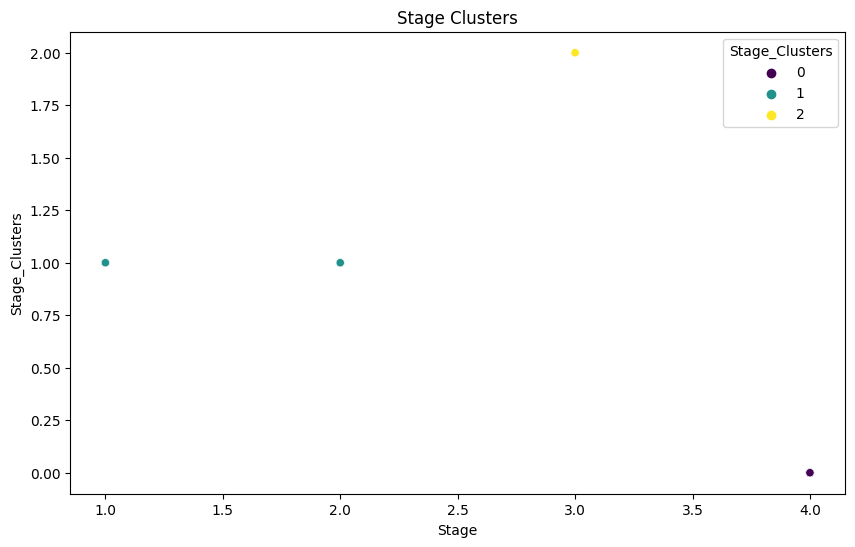

In [3]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns
# Create a copy of the Stage column to create 2D array
stage = df['Stage'].values.reshape(-1,1)

# Impute missing values with 3 nearest neighbors
imputer = SimpleImputer(strategy='most_frequent')
stage_imputed = imputer.fit_transform(stage)

n_clusters = 3  # Number of clusters

# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(stage_imputed)

# Get cluster assignments
df['Stage_Clusters'] = kmeans.labels_

# View cluster centers
plt.figure(figsize=(10,6))
plt.title('Stage Clusters')
sns.scatterplot(data=df, x='Stage', y='Stage_Clusters', hue='Stage_Clusters', palette='viridis')
plt.show()

Filling missing values in Stage column using KNN

In [15]:
from sklearn.impute import KNNImputer
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=3)

# Use the imputer to fill missing values in the 'Stage' column
df['Cholesterol'] = 
imputer.fit_transform(df['Cholesterol'].values.reshape(-1,1))


In [16]:
df['Cholesterol'].isna().sum() #check the missing values in Stage column

0

<center>
      <h1 style="font-size: 36px;"><strong>Handling Outliers in Dataset</strong></h1>
</center>

1. Visualize Outliers
   1. Histogram 
   2. Box plot
   3. Z-Score
2. Treating Outliers

<Axes: xlabel='Cholesterol', ylabel='Count'>

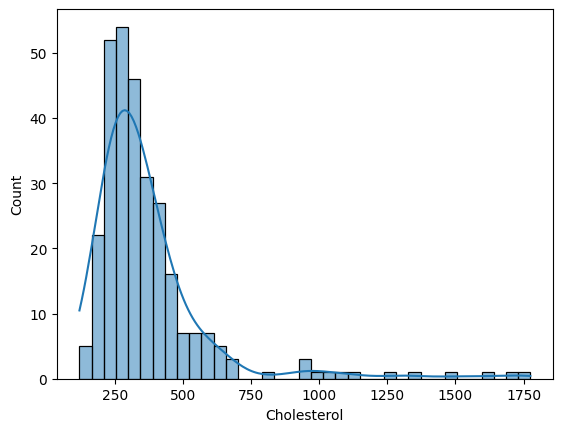

In [6]:
#View the histogram of Cholesterol column
import seaborn as sns
sns.histplot(data=df, x='Cholesterol', kde=True)

<Axes: xlabel='Cholesterol'>

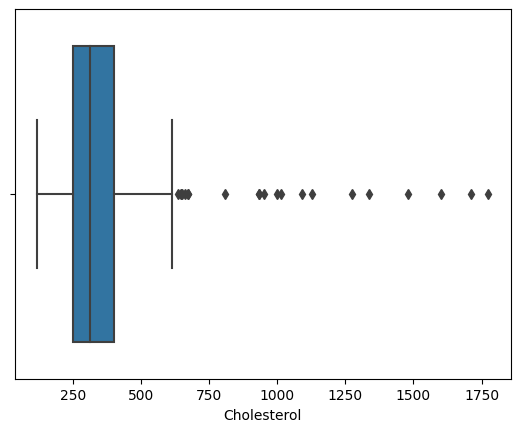

In [7]:
#View the box plot of Cholesterol column
sns.boxplot(data=df, x='Cholesterol')

In [8]:
#create mean and standard deviation of cholesterol column
mean = np.mean(df['Cholesterol'])
std = np.std(df['Cholesterol'])
print(f'Mean of the selected data is {mean} and standard deviation is {std}')
#calculate z-score for cholesterol column
df['z-score'] = (df['Cholesterol']-mean)/std 
df[['z-score', 'Cholesterol']].sample(10)


Mean of the selected data is 370.0405405405405 and standard deviation is 228.37156714615085


,z-score,Cholesterol
305,2.758485,1000.0
130,-0.442439,269.0
170,NaN,NaN
62,1.024468,604.0
248,-0.306696,300.0
231,0.341371,448.0
226,NaN,NaN
97,-0.740200,201.0
422,NaN,NaN
149,0.087399,390.0


In [12]:
#total outliers in cholesterol column
print('Outliers based on condition -3 > z-score > +3:') 
print(df[(df['z-score']<-3) | (df['z-score']>3)]['Cholesterol'])

Outliers based on condition -1 > z-score > +1:
26     1128.0
89     1600.0
134    1775.0
172    1480.0
197    1092.0
222    1276.0
244    1336.0
256    1712.0
Name: Cholesterol, dtype: float64


In [13]:
#Remove the outliers
df['Cholesterol'] = df['Cholesterol'][(df['z-score']>-3) & (df['z-score']<3)]

Note that 

1. `(df['z-score']>-1) & (df['z-score']<1)` returns a True value where the the z-score is between -1 and 1, i.e., it is not an outlier.

2. `df['Cholesterol'][(df['z-score']>-1) & (df['z-score']<1)]` selects the rows of the 'Cholesterol' column where the z-score is not an outlier.

3. `df['Cholesterol'] = df['Cholesterol'][(df['z-score']>-1) & (df['z-score']<1)]` replaces the 'Cholesterol' column with this selection, effectively removing the outliers.

In [42]:
df['Cholesterol'].sample(10)

28     222.000000
296    253.000000
133    420.000000
234    223.000000
58     498.000000
371    370.040541
116    267.000000
67     256.000000
375    370.040541
384    370.040541
Name: Cholesterol, dtype: float64

In [14]:
print(df[(df['z-score']<-3) | (df['z-score']>3)]['Cholesterol'])

26    NaN
89    NaN
134   NaN
172   NaN
197   NaN
222   NaN
244   NaN
256   NaN
Name: Cholesterol, dtype: float64


In [25]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

Handling Outlier using ML Algorithms. For example, apply SVM

In [ ]:
from sklearn.impute import SimpleImputer
# Select the column for outlier detection and reshape it in 2D array
tryglicerides_values = df['Tryglicerides'].values.reshape(-1, 1)

# Handle missing values by imputing NaNs with a constant value
imputer = SimpleImputer(strategy='constant', fill_value=0)
tryglicerides_values = imputer.fit_transform(tryglicerides_values)

# Define and train the K-means clustering model
kmeans_model = KMeans(n_clusters=3)  # Adjust the number of clusters based on data
kmeans_model.fit(tryglicerides_values)

# Predict the cluster labels
cluster_labels = kmeans_model.predict(tryglicerides_values)

# Convert cluster_labels to a pandas Series
cluster_labels = pd.Series(cluster_labels)

# Identify outliers based on cluster membership
outlier_mask = cluster_labels != cluster_labels.mode()[0]
print(outlier_mask)

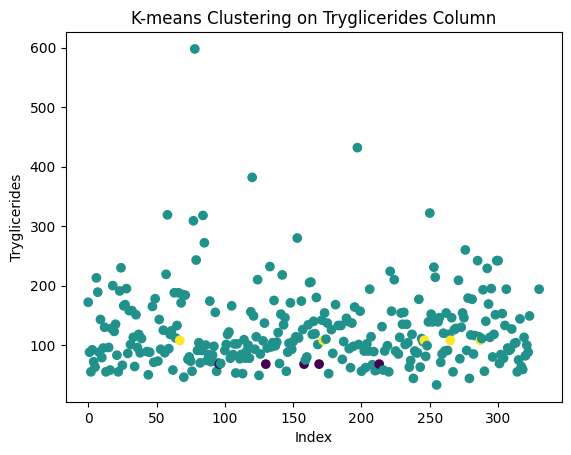

In [47]:
import matplotlib.pyplot as plt
# Add the cluster labels to the DataFrame
df['Tryglicerides_cluster'] = kmeans.labels_

# Plot the 'Platelets' column with the cluster labels
plt.scatter(range(len(df)), df['Tryglicerides'], c=df['Tryglicerides_cluster'])
plt.title('K-means Clustering on Tryglicerides Column')
plt.xlabel('Index')
plt.ylabel('Tryglicerides')
plt.show()

In [48]:
# Remove outliers from the DataFrame
df['Cholesterol'] = df['Tryglicerides'].loc[~outlier_mask]

# Print the DataFrame without outliers
print(f'Tryglicerides column without outliers: \n {df.Cholesterol}')

Tryglicerides column without outliers: 
 0       NaN
1      88.0
2      55.0
3      92.0
4      72.0
       ... 
430     NaN
431     NaN
432     NaN
433     NaN
434     NaN
Name: Cholesterol, Length: 435, dtype: float64


<center>
      <h1 style="font-size: 36px;"><strong>Apply Classifiers</strong></h1>
</center>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
encoder = LabelEncoder()

# Use the encoder to transform the non-numerical columns into numerical
df['Status'] = encoder.fit_transform(df['Status'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Drug'] = encoder.fit_transform(df['Drug'])
df['Ascites'] = encoder.fit_transform(df['Ascites'])
df['Hepatomegaly'] = encoder.fit_transform(df['Hepatomegaly'])
df['Spiders'] = encoder.fit_transform(df['Spiders'])
df['Edema'] = encoder.fit_transform(df['Edema'])


# Now the 'Status' column should be encoded as integers

In [83]:
# fill missing values with the median of each column
df_filled = df.fillna(df.median())

In [87]:
from sklearn.model_selection import train_test_split
#Separate data into train and test
X = df_filled.drop('Stage', axis = 1)
y = df_filled['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [88]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (304, 20)
X_test shape:  (131, 20)
y_train shape:  (304,)
y_test shape:  (131,)


In [89]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train);


# Make Prediction & print the result
y_pred = svc_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.20      0.10      0.13        30
         3.0       0.36      0.56      0.44        50
         4.0       0.54      0.47      0.50        45

    accuracy                           0.40       131
   macro avg       0.28      0.28      0.27       131
weighted avg       0.37      0.40      0.37       131



c:\Users\nagna\miniconda3\envs\DS_Practice\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nagna\miniconda3\envs\DS_Practice\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nagna\miniconda3\envs\DS_Practice\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<center>
      <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</center>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->